# Project 1:  Clustering Algorithms

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/JustGlowing/minisom/refs/heads/master/examples/democracy_index.csv')
df.head()

,Unnamed: 0,rank,country,democracy_index,electoral_processand_pluralism,functioning_of_government,political_participation,political_culture,civil_liberties,category
0,0,1,Norway,9.87,10.00,9.64,10.00,10.00,9.71,Full democracy
1,1,2,Iceland,9.58,10.00,9.29,8.89,10.00,9.71,Full democracy
2,2,3,Sweden,9.39,9.58,9.64,8.33,10.00,9.41,Full democracy
3,3,4,New Zealand,9.26,10.00,9.29,8.89,8.13,10.00,Full democracy
4,4,5,Denmark,9.22,10.00,9.29,8.33,9.38,9.12,Full democracy


In [ ]:
df.groupby('category')['country'].count()

,country
category,
Authoritarian,53
Flawed democracy,55
Full democracy,20
Hybrid regime,39


In [ ]:
filter_df = df[['country', 'electoral_processand_pluralism', 'functioning_of_government', 'political_participation', 'civil_liberties', 'political_culture']]
filter_df.head()

,country,electoral_processand_pluralism,functioning_of_government,political_participation,civil_liberties,political_culture
0,Norway,10.00,9.64,10.00,9.71,10.00
1,Iceland,10.00,9.29,8.89,9.71,10.00
2,Sweden,9.58,9.64,8.33,9.41,10.00
3,New Zealand,10.00,9.29,8.89,10.00,8.13
4,Denmark,10.00,9.29,8.33,9.12,9.38


In [ ]:
filter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         167 non-null    object 
 1   electoral_processand_pluralism  167 non-null    float64
 2   functioning_of_government       167 non-null    float64
 3   political_participation         167 non-null    float64
 4   civil_liberties                 167 non-null    float64
 5   political_culture               167 non-null    float64
dtypes: float64(5), object(1)
memory usage: 8.0+ KB


In [ ]:
filter_df.isnull().sum()


,0
country,0
electoral_processand_pluralism,0
functioning_of_government,0
political_participation,0
civil_liberties,0
political_culture,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
filter_df.iloc[:,1:] = scaler.fit_transform(filter_df.iloc[:,1:])
filter_df.head()

,country,electoral_processand_pluralism,functioning_of_government,political_participation,civil_liberties,political_culture
0,Norway,1.000,1.000000,1.000000,0.971,1.000000
1,Iceland,1.000,0.963693,0.875141,0.971,1.000000
2,Sweden,0.958,1.000000,0.812148,0.941,1.000000
3,New Zealand,1.000,0.963693,0.875141,1.000,0.786286
4,Denmark,1.000,0.963693,0.812148,0.912,0.929143


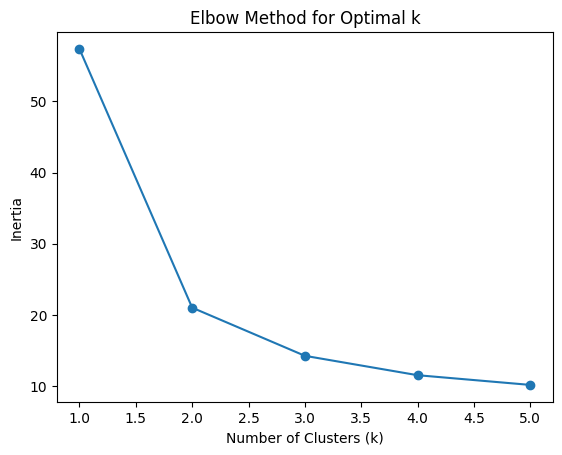

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method to find best k
ks = range(1, 6)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(filter_df.iloc[:, 1:])
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()




According to the elbow method, the data should organized into 3 clusters; one less than than the actual solution (number of regimes).

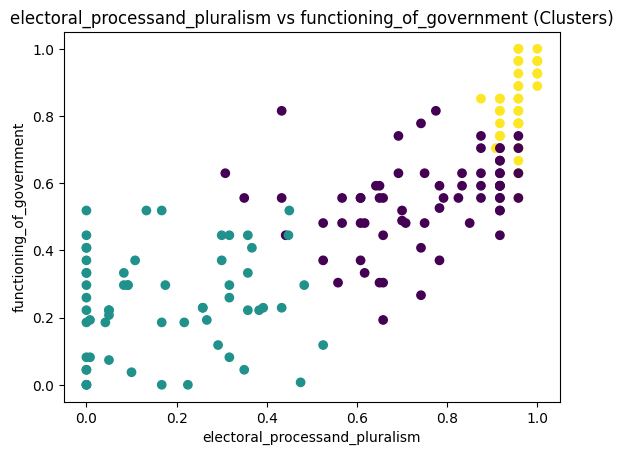

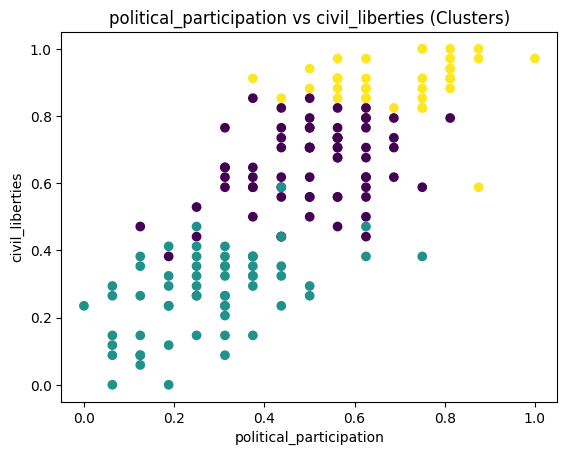

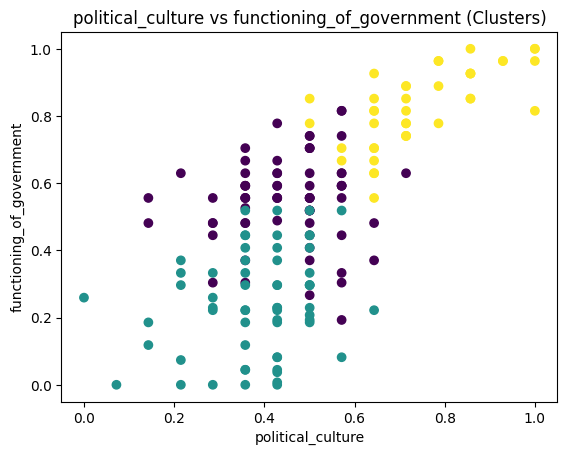

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
clust_km = km.fit_predict(filter_df.iloc[:, 1:])

# Create a copy to avoid SettingWithCopyWarning
filter_df_copy = filter_df.copy()
filter_df_copy['Cluster'] = clust_km

pairs = [
    ('electoral_processand_pluralism', 'functioning_of_government'),
    ('political_participation', 'civil_liberties'),
    ('political_culture', 'functioning_of_government')
]

for x, y in pairs:
    plt.scatter(filter_df_copy[x], filter_df_copy[y], c=clust_km)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'{x} vs {y} (Clusters)')
    plt.show()

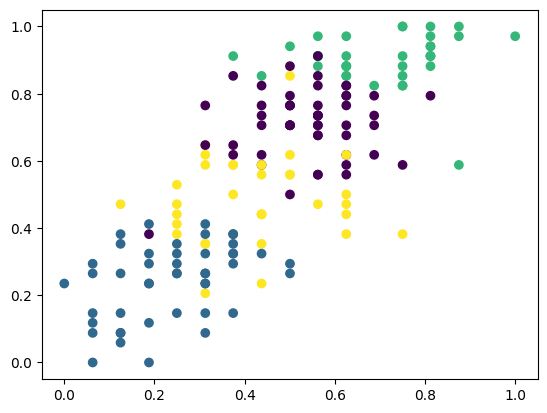

In [ ]:
#Lets see if there is any difference when using k=4 clusters
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
clust_km = km.fit_predict(filter_df.iloc[:,1:])
plt.scatter(filter_df.iloc[:,3], filter_df.iloc[:,4], c=clust_km)
plt.show()

If the dataset is mapped to 4 clusters we see that each cluster blends into the other and the algorthim can not create distinct clusters. As Full democracy is only ~12% of the data the algortithm would not be able to properly cluster it.


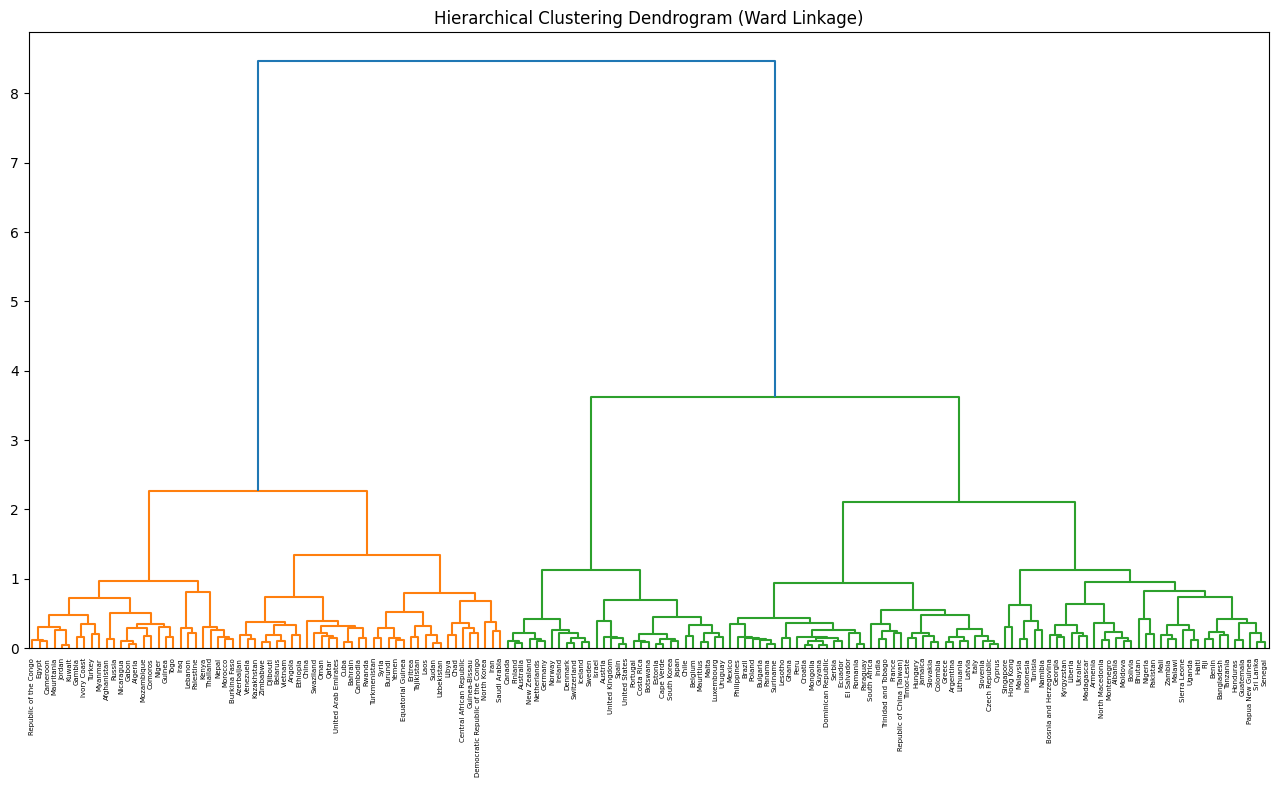

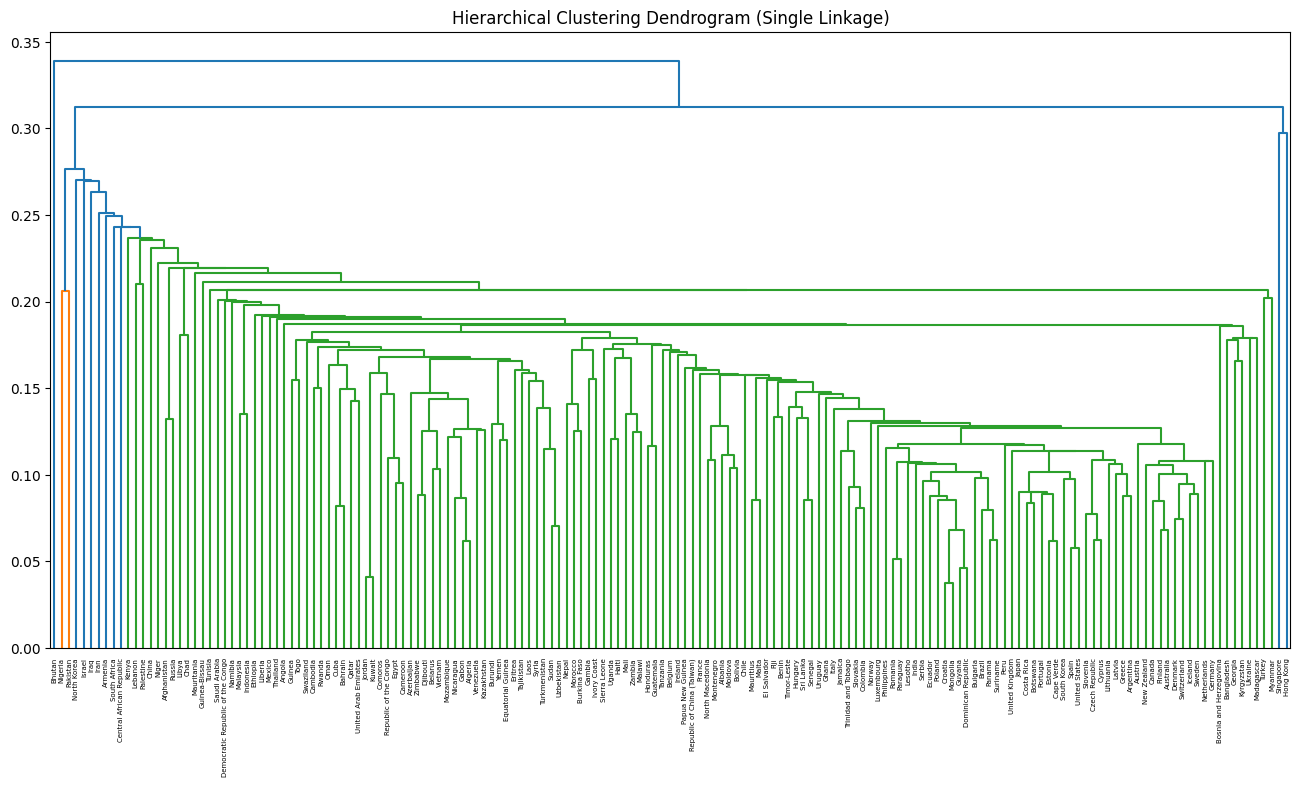

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Ward dendrogram
plt.figure(figsize=(16, 8))
Z = linkage(filter_df.iloc[:, 1:6], method='ward')
dendrogram(Z, labels=filter_df['country'].values, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.show()

# Single dendrogram
plt.figure(figsize=(16, 8))
Z_single = linkage(filter_df.iloc[:, 1:6], method='single')
dendrogram(Z_single, labels=filter_df['country'].values, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram (Single Linkage)')
plt.show()


In [ ]:
filter_df_copy.head()

,country,electoral_processand_pluralism,functioning_of_government,political_participation,civil_liberties,political_culture,Cluster
0,Norway,1.000,1.000000,1.000000,0.971,1.000000,2
1,Iceland,1.000,0.963693,0.875141,0.971,1.000000,2
2,Sweden,0.958,1.000000,0.812148,0.941,1.000000,2
3,New Zealand,1.000,0.963693,0.875141,1.000,0.786286,2
4,Denmark,1.000,0.963693,0.812148,0.912,0.929143,2


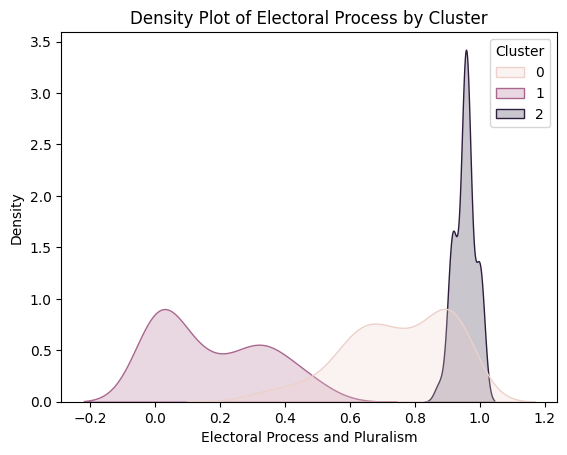

In [ ]:
## YOUR CODE HERE
#Used the k means clustering. I added the cluster as a new column.
import seaborn as sns

sns.kdeplot(data=filter_df_copy, x='electoral_processand_pluralism', hue='Cluster', fill=True)
plt.title('Density Plot of Electoral Process by Cluster')
plt.xlabel('Electoral Process and Pluralism')
plt.show()